# PROBLEM STATEMENT

- Add a dense layer with 500 units, using ReLu activation function. The input_dim=2 specifies that the input to this layer has two features.

- Add another dense layer with 1 unit and use sigmoid activation function.

- Configure the model to minimize binary crossentropy as the loss function, use the SGD optimizer for weight updates and monitor metrics as during training.

# DATA PREPARATION


### Loading the Dataset

In [17]:
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential

In [18]:
x, y = make_moons(n_samples = 100, noise=0.2, random_state = 1)

In [19]:
print(x[0:10])

print(y[0:10])

[[ 1.36698238 -0.23541584]
 [ 1.76404402 -0.34563288]
 [-0.37868174  0.41004375]
 [ 1.15113747 -0.13597622]
 [ 2.31168314  0.32295125]
 [ 0.53866045  0.73704603]
 [-0.93583639  1.00686001]
 [ 1.32563024 -0.13540284]
 [ 0.75398022 -0.37261326]
 [ 0.42764536 -0.38163078]]
[1 1 0 1 1 0 0 1 1 1]


### Splitting the Dataset

In [20]:
n_train = 30      # first 30 rows for training instances

x_train, x_test = x[:n_train, :], x[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

# SEQUENTIAL MODEL

### Model Building

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD

In [22]:
model = Sequential()

model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

### Model Training

In [24]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test)

print(f"\n\nTest loss: {loss}, Test accuracy: {accuracy}")

Epoch 1/100
1/1 [==============================] - 1s 835ms/step - loss: 0.6597 - accuracy: 0.8333 - val_loss: 0.6704 - val_accuracy: 0.6857
Epoch 2/100
1/1 [==============================] - 0s 84ms/step - loss: 0.6577 - accuracy: 0.8333 - val_loss: 0.6692 - val_accuracy: 0.6857
Epoch 3/100
1/1 [==============================] - 0s 63ms/step - loss: 0.6557 - accuracy: 0.8333 - val_loss: 0.6680 - val_accuracy: 0.6857
Epoch 4/100
1/1 [==============================] - 0s 66ms/step - loss: 0.6536 - accuracy: 0.8333 - val_loss: 0.6668 - val_accuracy: 0.6857
Epoch 5/100
1/1 [==============================] - 0s 51ms/step - loss: 0.6516 - accuracy: 0.8333 - val_loss: 0.6656 - val_accuracy: 0.6857
Epoch 6/100
1/1 [==============================] - 0s 57ms/step - loss: 0.6497 - accuracy: 0.8333 - val_loss: 0.6644 - val_accuracy: 0.6857
Epoch 7/100
1/1 [==============================] - 0s 70ms/step - loss: 0.6477 - accuracy: 0.8333 - val_loss: 0.6632 - val_accuracy: 0.6857
Epoch 8/100
1/1 [==

In [25]:
y_pred = model.predict(x_test)

3/3 [==============================] - 0s 4ms/step


### Model Performance and Overfitting

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,  f1_score, precision_score

print("ACCURACY : ", accuracy_score(y_test.astype("int32"), y_pred.astype("int32")))

print("RECALL : ", recall_score(y_test.astype("int32"), y_pred.astype("int32")))

print("PRECISION : ", precision_score(y_test.astype("int32"), y_pred.astype("int32")))

print("F1 : ", f1_score(y_test.astype("int32"), y_pred.astype("int32")))

confusion_matrix(y_test.astype("int32"), y_pred.astype("int32"))

ACCURACY :  0.5142857142857142
RECALL :  0.0
PRECISION :  0.0
F1 :  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[36,  0],
       [34,  0]])

**NOTE:**

- We can clearly see that the accuray of Training Data (84%) is clearly more than accuracy of Testing Data (48%)

- Hence, clearly there is an issue of **OVERFIITING**.

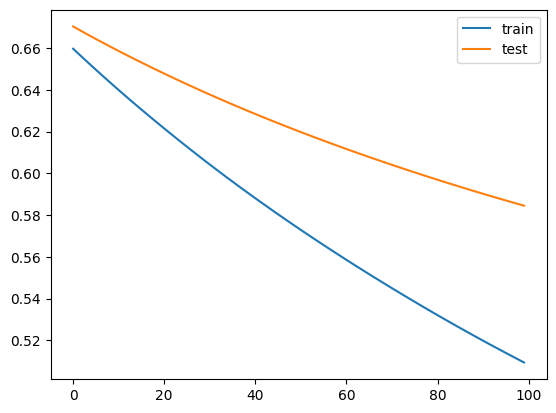

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'train');
plt.plot(history.history['val_loss'], label = 'test');
plt.legend()
plt.show()

<hr>

# CALLBACKS

### Early Stopping

- `monitor = 'val_loss'` means that the validation loss is being monitored during the training.

- `patience = 10` means that training will be stopped if the validation loss doesn’t improve after 10 epochs.

- `mode = 'min'` means whether the training should stop when the monitored quantity stops increasing or decreasing.

- `verbose = 0`, it will be silent. If verbose=1, it will print a message when early stopping is triggered.

In [56]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

### Model Checkpoints

- The `mode` is set to 'max', which means that the models with the smallest accuracy will be saved.

- The `save_best_only` parameter is set to True, which means that the latest best model according to the quantity monitored will not be overwritten.

- If `verbose=1`, it will print out whether or not the model was saved after each epoch.



In [57]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("./model/best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

### Model Training with callbacks

In [58]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stopping, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3668 - accuracy: 0.9000
Epoch 1: val_accuracy improved from -inf to 0.72857, saving model to ./model/best_model.h5
1/1 [==============================] - 0s 479ms/step - loss: 0.3668 - accuracy: 0.9000 - val_loss: 0.5106 - val_accuracy: 0.7286
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.3663 - accuracy: 0.9000
Epoch 2: val_accuracy did not improve from 0.72857
1/1 [==============================] - 0s 41ms/step - loss: 0.3663 - accuracy: 0.9000 - val_loss: 0.5103 - val_accuracy: 0.7286
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3658 - accuracy: 0.9000
Epoch 3: val_accuracy did not improve from 0.72857
1/1 [==============================] - 0s 45ms/step - loss: 0.3658 - accuracy: 0.9000 - val_loss: 0.5101 - val_accuracy: 0.7286
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3653 - accuracy: 0.9000
Epoch 4: val_accuracy did not improve from 0.72857

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_accuracy did not improve from 0.72857
1/1 [==============================] - 0s 55ms/step - loss: 0.3648 - accuracy: 0.9000 - val_loss: 0.5096 - val_accuracy: 0.7286
Epoch 6/100
1/1 [==============================] - ETA: 0s - loss: 0.3643 - accuracy: 0.9000
Epoch 6: val_accuracy did not improve from 0.72857
1/1 [==============================] - 0s 43ms/step - loss: 0.3643 - accuracy: 0.9000 - val_loss: 0.5094 - val_accuracy: 0.7286
Epoch 7/100
1/1 [==============================] - ETA: 0s - loss: 0.3638 - accuracy: 0.9000
Epoch 7: val_accuracy did not improve from 0.72857
1/1 [==============================] - 0s 54ms/step - loss: 0.3638 - accuracy: 0.9000 - val_loss: 0.5091 - val_accuracy: 0.7286
Epoch 8/100
1/1 [==============================] - ETA: 0s - loss: 0.3633 - accuracy: 0.9000
Epoch 8: val_accuracy did not improve from 0.72857
1/1 [==============================] - 0s 55ms/step - loss: 0.3633 - accuracy: 0.9000 - val_loss: 0.5089 - val_accuracy: 0.7286
Epoc

### Saving Model History Explicitly

In [59]:
import pickle

with open('./model/best_model_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# LOADING SAVED MODELS

In [60]:
from keras.models import load_model

loaded_model = load_model('./model/best_model.h5')

In [61]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 500)               1500      
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
print("ACTUAL VALUE : ",y_train[0])

print(f"PREDICTED VALUE : {loaded_model.predict([[ 1.36698238, -0.23541584]])[0][0]} >>>>> Approximately : {round(loaded_model.predict([[ 1.36698238, -0.23541584]])[0][0])}")

ACTUAL VALUE :  1
1/1 [==============================] - 0s 31ms/step
PREDICTED VALUE : 0.8270606398582458 >>>>> Approximately : 1


### Evaluating the Loaded Model

In [69]:
_, train_acc = loaded_model.evaluate(x_train, y_train, verbose = 1)

test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose = 1, batch_size = len(x_test))

print("TRAIN ACCURACY", train_acc)
print("TEST ACCURACY", test_acc)

1/1 [==============================] - 0s 102ms/step - loss: 0.5106 - accuracy: 0.7286
TRAIN ACCURACY 0.8999999761581421
TEST ACCURACY 0.7285714149475098


### Reading Model History

In [ ]:
with open('./model/best_model_history.pkl', 'rb') as f:
    loaded_history = pickle.load(f)

plt.plot(loaded_history['loss'], label = 'train');
plt.plot(loaded_history['val_loss'], label = 'test');
plt.legend()
plt.show()

<hr><hr>